In [ ]:
#GSE178967_genecol_NArem_Aggregated_nzv_180samples_35587genes
Data <- read.table("/content/GSE178967_genecol_NArem_Aggregated_nzv_round.txt", header = TRUE, sep = "\t", check.names = FALSE, row.names=1)

In [ ]:
#create GSE178967_severe_COUNT_GENESYM_Aggregate_NArem_Zrem_round_deseq2input.txt
#REMOVE "L_313_00", "L_318_00", "L_344_00"
which(colnames(Data) %in% c("L_001_00", "L_142_00", "L_148_00", "L_150_00"))

[1]  6 22 94 95

In [ ]:
#REMOVE , "L_174_00", "L_301_00", "L_303_00", "L_325_00"
which(colnames(Data) %in% c("L_006_00", "L_118_00", "L_311_00", "L_329_00"))

[1]   9  97 115 174

In [ ]:
GSE178967_severe_asymp_deseq2input<- Data[,c(95, 94, 22, 6, 174, 97, 115, 9 )]

In [ ]:
head(GSE178967_severe_asymp_deseq2input)

,L_001_00,L_142_00,L_148_00,L_150_00,L_006_00,L_118_00,L_311_00,L_329_00
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A1BG,66,49,49,51,27,34,26,14
A1CF,5,3,4,4,2,2,2,1
A2M,47,87,89,217,20,80,25,22
A2ML1,10,9,8,10,6,4,5,3
A2MP1,29,44,43,122,7,46,15,6
A3GALT2,10,10,4,0,1,3,7,0


In [ ]:
#write the file WITH FIRST AS ID.
write.table(data.frame('ID'=rownames(GSE178967_severe_asymp_deseq2input), GSE178967_severe_asymp_deseq2input),file="GSE178967_severe_asymp_deseq2input.txt",sep='\t',quote = F,row.names = FALSE)

In [ ]:
#GSE178967_genecol_NArem_Aggregated_nzv_15 SAMPLES_SEVERE_ASYMP
GSE178967_severe_asymp_deseq2input <- read.table("/content/GSE178967_severe_asymp_deseq2input.txt", header = TRUE, sep = "\t", check.names = FALSE)

In [ ]:
#create the metadata file or load it. 

metaData <- read.table("/content/meta.txt", header = TRUE, sep = "\t")

In [ ]:
metaData

ID,Severity
<chr>,<chr>
L_001_00,Asymptomatic
L_142_00,Asymptomatic
L_148_00,Asymptomatic
L_150_00,Asymptomatic
L_006_00,Severe
L_118_00,Severe
L_311_00,Severe
L_329_00,Severe


In [ ]:
#INSTALL PACKAGES

if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#LOAD PACKAGES

BiocManager::install("GenomeInfoDbData")
BiocManager::install("DESeq2")
library(DESeq2)
library(ggplot2)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'GenomeInfoDbData'

Old packages: 'broom', 'cli', 'dtplyr', 'fansi', 'gert', 'jsonlite', 'Rcpp',
  'testthat', 'class', 'foreign', 'MASS', 'nlme', 'nnet', 'spatial'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, 

In [ ]:
deseq2Data <- DESeqDataSetFromMatrix(countData=GSE178967_severe_asymp_deseq2input, colData=metaData, design=~Severity, tidy = TRUE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [ ]:
#VIEW
deseq2Data

class: DESeqDataSet 
dim: 35587 8 
metadata(1): version
assays(1): counts
rownames(35587): A1BG A1CF ... ZYXP1 ZZEF1
rowData names(0):
colnames(8): L_001_00 L_142_00 ... L_311_00 L_329_00
colData names(2): ID Severity

In [ ]:
dds <- DESeq(deseq2Data)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
res <- results(dds)

In [ ]:
head(results(dds, tidy=TRUE))

,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,37.400715,-0.5499564,0.3171117,-1.7342672,0.08287068,0.2488470
2,A1CF,2.714173,-0.6507187,0.8592859,-0.7572785,0.44888305,NA
3,A2M,66.274642,-1.1027671,0.5493304,-2.0074750,0.04469912,0.1679796
4,A2ML1,6.592470,-0.4968602,0.5689714,-0.8732605,0.38252112,0.6174068
5,A2MP1,34.948912,-1.1930902,0.6657211,-1.7921772,0.07310459,0.2305324
6,A3GALT2,4.398089,-0.4704629,1.2457816,-0.3776447,0.70569452,0.8531113


In [ ]:
summary(res)


out of 26261 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2637, 10%
LFC < 0 (down)     : 1041, 4%
outliers [1]       : 48, 0.18%
low counts [2]     : 8494, 32%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): Severity Severe vs Asymptomatic 
Wald test p-value: Severity Severe vs Asymptomatic 
DataFrame with 6 rows and 6 columns
            baseMean log2FoldChange     lfcSE      stat      pvalue        padj
           <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
AC104837.2   144.824        5.67090  0.379151   14.9568 1.40544e-50 2.49030e-46
IFIT2      10493.361        4.91682  0.375468   13.0952 3.50938e-39 3.10913e-35
IFIT3      13138.864        5.26677  0.408198   12.9025 4.35900e-38 2.57457e-34
EIF2AK2      839.832        2.82643  0.222616   12.6964 6.18819e-37 2.19297e-33
IFIT5       3172.296        3.53408  0.278019   12.7116 5.09540e-37 2.19297e-33
IFIH1        657.907        3.62607  0.287591   12.6084 1.89804e-36 5.60523e-33

In [ ]:
tail(res)

log2 fold change (MLE): Severity Severe vs Asymptomatic 
Wald test p-value: Severity Severe vs Asymptomatic 
DataFrame with 6 rows and 6 columns
          baseMean log2FoldChange     lfcSE       stat    pvalue      padj
         <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
ZSWIM2   0.0000000             NA        NA         NA        NA        NA
ZSWIM5P1 0.0926067      -0.188814   3.53381 -0.0534306  0.957389        NA
ZSWIM5P2 0.0000000             NA        NA         NA        NA        NA
ZSWIM5P3 0.0000000             NA        NA         NA        NA        NA
ZYG11AP1 0.0000000             NA        NA         NA        NA        NA
ZYXP1    0.0000000             NA        NA         NA        NA        NA

In [ ]:
result <-as.data.frame(res)

In [ ]:
dim(result)

[1] 35587     6

In [ ]:
#wrie the file so that we can 
write.table(result,file="/content/GSE178967_4sev_4asymp_DESEQ_result_22_Jan.txt", sep='\t',  quote = F,row.names = TRUE)

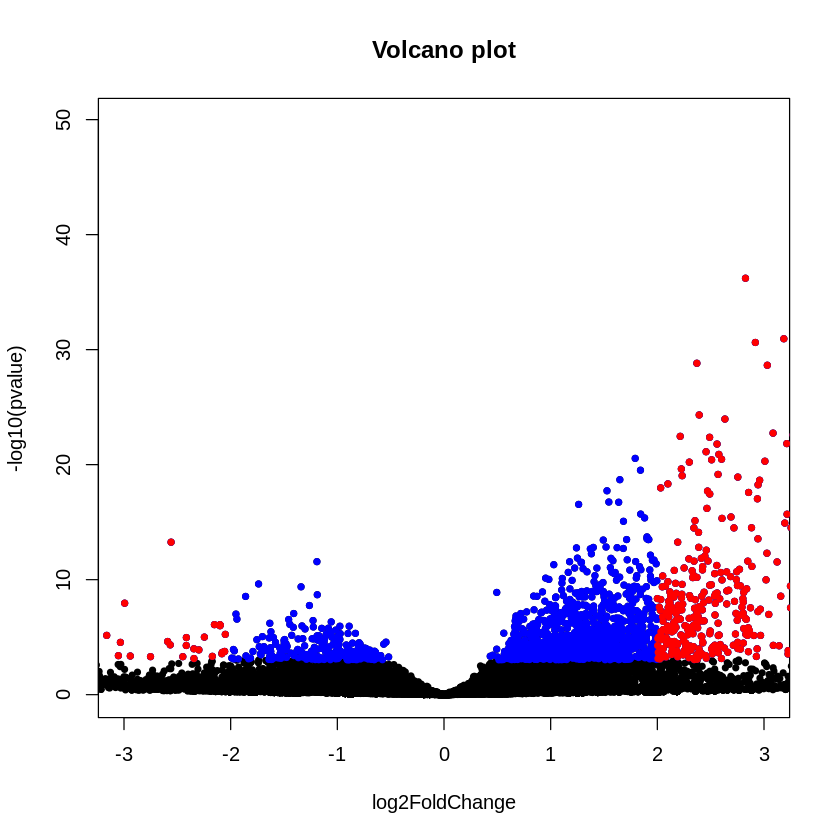

In [ ]:
#code to create volcano plot

#reset par
par(mfrow=c(1,1))
# Make a basic volcano plot
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [ ]:
#filter and remove col having values NA for padj
result1<- subset(result, padj != "NA")

In [ ]:
head(result1)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AC104837.2,144.8238,5.670900,0.3791509,14.95684,1.405440e-50,2.490299e-46
IFIT2,10493.3606,4.916817,0.3754683,13.09516,3.509379e-39,3.109135e-35
IFIT3,13138.8639,5.266765,0.4081982,12.90247,4.358998e-38,2.574570e-34
EIF2AK2,839.8323,2.826431,0.2226160,12.69644,6.188193e-37,2.192972e-33
IFIT5,3172.2958,3.534082,0.2780194,12.71164,5.095405e-37,2.192972e-33
IFIH1,657.9066,3.626066,0.2875912,12.60840,1.898042e-36,5.605234e-33


In [ ]:
tail(result1)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STARD5,193.091851,3.576025e-04,0.2787984,1.282656e-03,0.9989766,0.9993611
TMEM186,61.899146,-2.870450e-04,0.2731370,-1.050920e-03,0.9991615,0.9993611
UBE2J2,19.944402,-3.413748e-04,0.3356168,-1.017157e-03,0.9991884,0.9993611
ZNF778,51.335449,-1.230266e-04,0.2587418,-4.754804e-04,0.9996206,0.9997335
IGLC3,128.422626,-1.708485e-04,1.0690391,-1.598151e-04,0.9998725,0.9999289
AP002358.2,3.473225,6.809215e-05,1.0258862,6.637398e-05,0.9999470,0.9999470


In [ ]:
# Sort features based on FDRy value
sorted_features <- as.data.frame(result1[order(result1[,"padj"], decreasing =  FALSE),])

In [ ]:
head(sorted_features)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AC104837.2,144.8238,5.670900,0.3791509,14.95684,1.405440e-50,2.490299e-46
IFIT2,10493.3606,4.916817,0.3754683,13.09516,3.509379e-39,3.109135e-35
IFIT3,13138.8639,5.266765,0.4081982,12.90247,4.358998e-38,2.574570e-34
EIF2AK2,839.8323,2.826431,0.2226160,12.69644,6.188193e-37,2.192972e-33
IFIT5,3172.2958,3.534082,0.2780194,12.71164,5.095405e-37,2.192972e-33
IFIH1,657.9066,3.626066,0.2875912,12.60840,1.898042e-36,5.605234e-33


In [ ]:
tail(sorted_features)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STARD5,193.091851,3.576025e-04,0.2787984,1.282656e-03,0.9989766,0.9993611
TMEM186,61.899146,-2.870450e-04,0.2731370,-1.050920e-03,0.9991615,0.9993611
UBE2J2,19.944402,-3.413748e-04,0.3356168,-1.017157e-03,0.9991884,0.9993611
ZNF778,51.335449,-1.230266e-04,0.2587418,-4.754804e-04,0.9996206,0.9997335
IGLC3,128.422626,-1.708485e-04,1.0690391,-1.598151e-04,0.9998725,0.9999289
AP002358.2,3.473225,6.809215e-05,1.0258862,6.637398e-05,0.9999470,0.9999470


In [ ]:
#select significant features based on FDR <0.05
sig_features <- sorted_features[sorted_features$padj < 0.05, ]

In [ ]:
dim(sig_features)

[1] 2837    6

In [ ]:
#select top features based on FDR <0.05 & FC > +/- 1.2
# upregulated genes
upreg_features <- sig_features[sig_features$log2FoldChange > 1.2, ]

In [ ]:
dim(upreg_features)

[1] 1224    6

In [ ]:
#upregulated genes
downreg_features <- sig_features[sig_features$log2FoldChange < -1.2, ]

In [ ]:
dim(downreg_features)

[1] 268   6

In [ ]:
#Write results of significantly upreguated  genes into a file
#write the file WITH FIRST AS ID.
write.table(data.frame('ID'=rownames(upreg_features), upreg_features),file="GSE178967_4sev_4asymp_upreg.txt",sep='\t',quote = F,row.names = FALSE)
#write.table(upreg_features,file="/content/GSE178967_sev_asym_padj_0.05_upreg_features.txt", sep='\t',  quote = F,row.names = T)

In [ ]:
#Write results of significantly downreguated  genes  into a file
#write.table(downreg_features,file="/content/GSE178967_sev_asym_padj_0.05_downreg_features.txt", sep='\t',  quote = F,row.names = T)

#write the file WITH FIRST AS ID.
write.table(data.frame('ID'=rownames(downreg_features), downreg_features),file="GSE178967_4sev_4asymp_downreg.txt",sep='\t',quote = F,row.names = FALSE)




vst

In [ ]:
#First we need to transform the raw count data
#vst function will perform variance stabilizing transformation (VST)
#dds is deseq2dataset created in one of the above step.

vsdata <- vst(dds, blind=FALSE)
vsd <- vst(dds, blind=FALSE)
rld <- rlog(dds, blind=FALSE)
head(assay(vsd), 3)

,L_001_00,L_142_00,L_148_00,L_150_00,L_313_00,L_318_00,L_344_00,L_006_00,L_118_00,L_174_00,L_301_00,L_303_00,L_311_00,L_325_00,L_329_00
A1BG,5.532435,5.435789,5.397818,5.305047,4.691329,5.296085,4.990755,5.048005,5.133163,5.558367,5.270838,5.141194,5.297057,5.694713,4.366465
A1CF,3.465043,3.332043,3.443606,3.387150,2.983112,3.548910,3.181283,3.263578,3.208563,3.775568,3.598312,3.347140,3.375429,3.583652,3.016008
A2M,5.160936,6.109316,6.095235,7.077576,6.740540,6.348774,6.240826,4.751484,6.111373,6.178414,7.034126,6.610783,5.254696,5.694713,4.769505


In [ ]:
#First we need to transform the raw count data
#vst function will perform variance stabilizing transformation
#IMPORTANT TO NOT THAT WE USE dds OBJECT HERE. WHY? 

vsdata <- vst(dds, blind=FALSE)

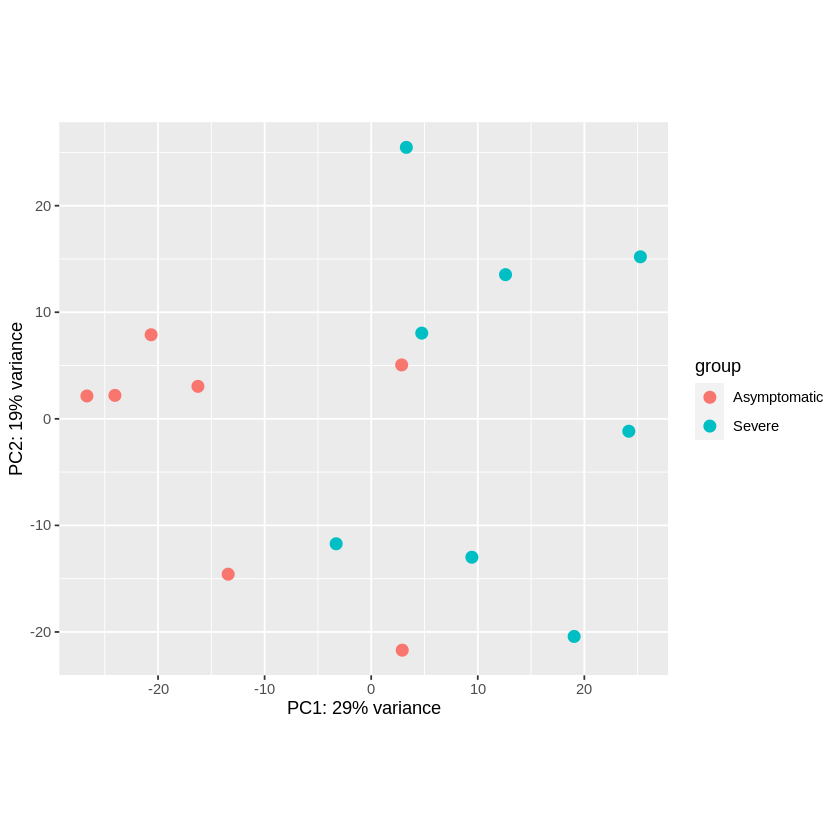

In [ ]:
#using the DESEQ2 plotPCA fxn we can
plotPCA(vsdata, intgroup="Severity") 

heatmap

In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pheatmap)

In [ ]:
# this gives log2(n + 1)
ntd <- normTransform(dds)

In [ ]:
assay(ntd)

,L_001_00,L_142_00,L_148_00,L_150_00,L_313_00,L_318_00,L_344_00,L_006_00,L_118_00,L_174_00,L_301_00,L_303_00,L_311_00,L_325_00,L_329_00
A1BG,5.2022537,5.081649,5.0337756,4.915573,4.0788372,4.904058,4.500352,4.5778576,4.6915303,5.2343222,4.871524,4.7021540,4.905307,5.401041,3.5840645
A1CF,1.8927093,1.590739,1.8449842,1.717523,0.7580867,2.075767,1.233924,1.4302693,1.2993457,2.5413885,2.180844,1.6256957,1.690747,2.149876,0.8360703
A2M,4.7282035,5.891153,5.8748684,6.967661,6.6011501,6.164807,6.042181,4.1658879,5.8935296,5.9707404,6.920798,6.4580028,4.850648,5.401041,4.1917190
A2ML1,2.6840643,2.814778,2.6287690,2.748844,1.9126440,2.075767,1.889130,2.6052360,1.9717164,2.9542124,2.180844,2.5526529,2.716024,2.149876,1.7465462
A2MP1,4.0649907,4.931204,4.8514627,6.145795,5.3848623,5.621620,5.329472,2.7933539,5.1129906,4.5644394,5.846669,5.3690330,4.146638,3.499997,2.5137650
A3GALT2,2.6840643,2.946130,1.8449842,0.000000,1.9126440,0.000000,2.338047,0.8855627,1.6743516,2.5413885,0.000000,1.2573765,3.137312,0.000000,0.0000000
A4GALT,1.6647811,2.122141,2.2894613,2.148306,1.2524716,2.893628,0.000000,2.3888578,1.6743516,2.6561850,3.012278,2.5526529,2.118478,2.977425,1.7465462
A4GNT,0.6254237,0.000000,0.0000000,0.000000,0.7580867,0.000000,0.000000,0.0000000,0.0000000,2.1292972,0.000000,0.0000000,0.000000,2.977425,0.0000000
AAAS,2.6840643,2.814778,2.7725409,2.479600,2.8522418,2.075767,3.187824,2.1342013,2.2181398,1.9608431,2.180844,1.9188489,2.447970,2.149876,2.5137650
AACS,4.8142013,4.763224,4.6427324,4.771897,3.4164948,4.342989,3.719023,4.0227878,4.1540876,4.5644394,4.472821,4.3553326,4.052909,4.434786,3.4863736


In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [ ]:
BiocManager::install("vsn")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'vsn'

also installing the dependencies ‘affyio’, ‘preprocessCore’, ‘affy’, ‘limma’


Old packages: 'broom', 'cli', 'dtplyr', 'fansi', 'gert', 'jsonlite', 'Rcpp',
  'testthat', 'class', 'foreign', 'MASS', 'nlme', 'nnet', 'spatial'



In [ ]:
library("vsn")

In [ ]:
install.packages("hexbin") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



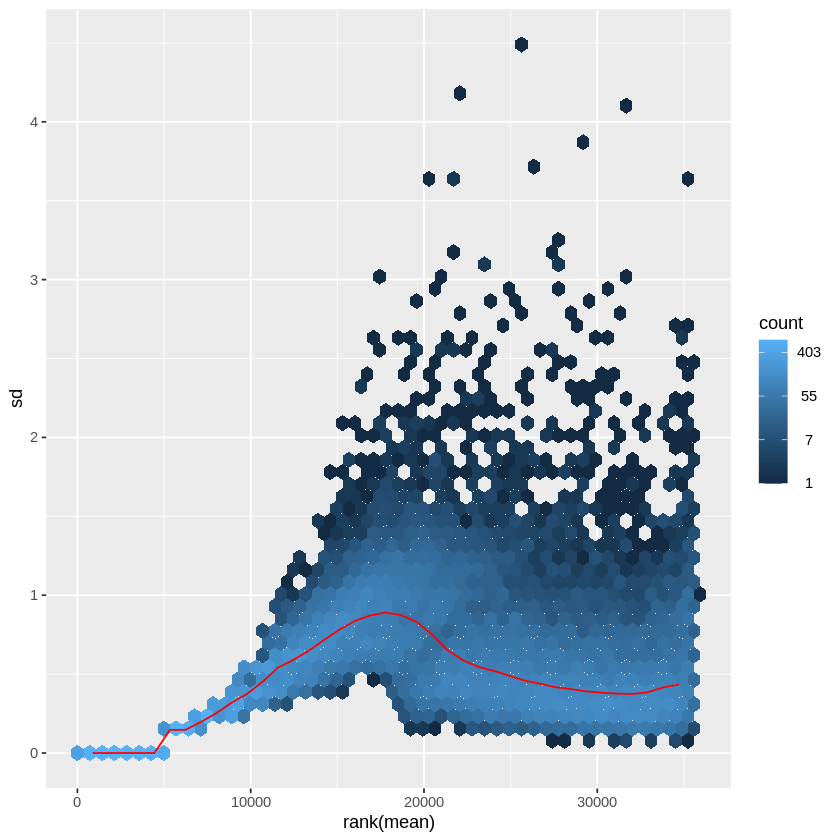

In [ ]:
meanSdPlot(assay(ntd))

In [ ]:
#pheatmap
select <- order(rowMeans(counts(dds,normalized=TRUE)),
                decreasing=TRUE)[1:20]

In [ ]:
select

[1]  1210 16215 21330 21338 16214 16213 28818 21327 20826 14958 31679 32342
[13] 17267 24631 20833 19732 21329 17266 20835 30772

In [ ]:
df <- as.data.frame(colData(dds)["Severity"])

In [ ]:
head(df)

,Severity
,<fct>
L_001_00,Asymptomatic
L_142_00,Asymptomatic
L_148_00,Asymptomatic
L_150_00,Asymptomatic
L_313_00,Asymptomatic
L_318_00,Asymptomatic


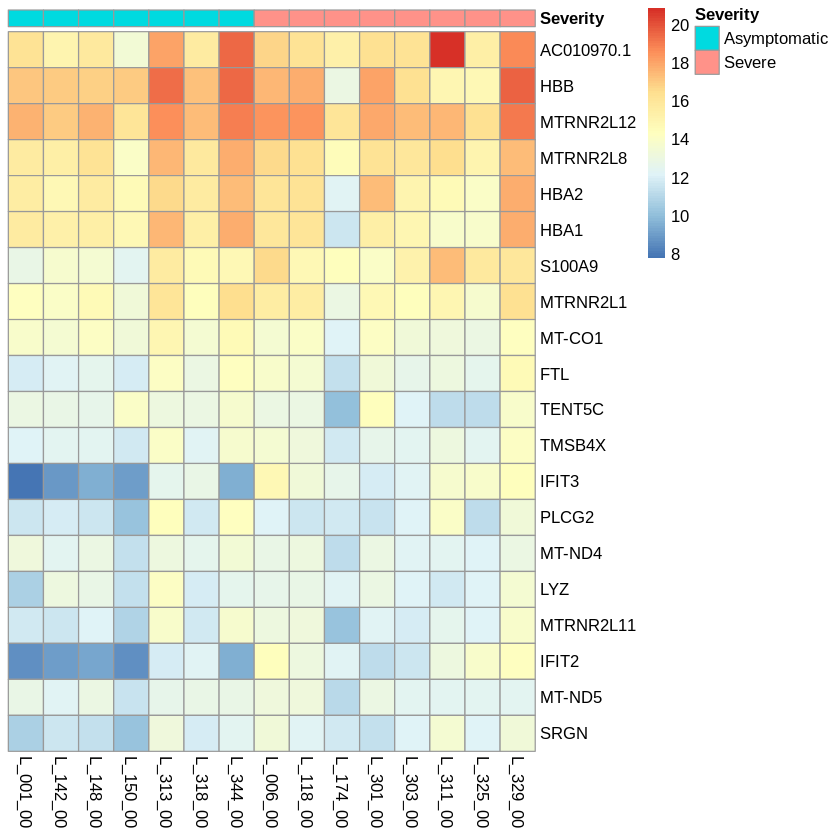

In [ ]:
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=T, cluster_cols=FALSE, annotation_col=df)

In [ ]:
Deseq_norm <- as.data.frame(assay(ntd))

In [ ]:
dim(Deseq_norm )

[1] 35587    15

In [ ]:
#wrtite into a file
write.table(Deseq_norm, file="/content/DESEQ_NORM.txt", sep='\t',  quote = F)